### Imoportando os dados

In [12]:
#importanto bibliotecas

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#importando dados

arquivo = "PB Pescadores(in).xlsx"
df = pd.read_excel(arquivo)
df.head()

,CPF,Nome do Pescador,Dt Nascimento,Nivel Escolaridade,Tipo Alfabetizacao,Sexo,Categoria,Forma de Atuacao,UF,Município
0,***.028.831-**,MARIA **************,1972,PRIMEIRO QUARTO ANO INCOMPLETO,COMPLETAMENTE ALFABETIZADO,Feminino,Artesanal,Desembarcado,PB,Triunfo
1,***.036.234-**,FRANCISCA **************,1968,QUINTO NONO ANO INCOMPLETO,PARCIALMENTE ALFABETIZADO,Feminino,Artesanal,Desembarcado,PB,São José de Piranhas
2,***.038.684-**,JOSE ***********************,1967,PRIMEIRO QUARTO ANO COMPLETO,PARCIALMENTE ALFABETIZADO,Masculino,Artesanal,Desembarcado,PB,Pombal
3,***.044.264-**,JOSE **********,1970,PRIMEIRO QUARTO ANO COMPLETO,NaN,Masculino,Artesanal,Desembarcado,PB,São Domingos
4,***.045.194-**,RAIMUNDO ******,1974,PRIMEIRO QUARTO ANO INCOMPLETO,PARCIALMENTE ALFABETIZADO,Masculino,Artesanal,Desembarcado,PB,Pombal


### GERANDO VISUALIZAÇÕES

#### Qual o nível de escolaridade predominante entre os pescadores(as) da PB?

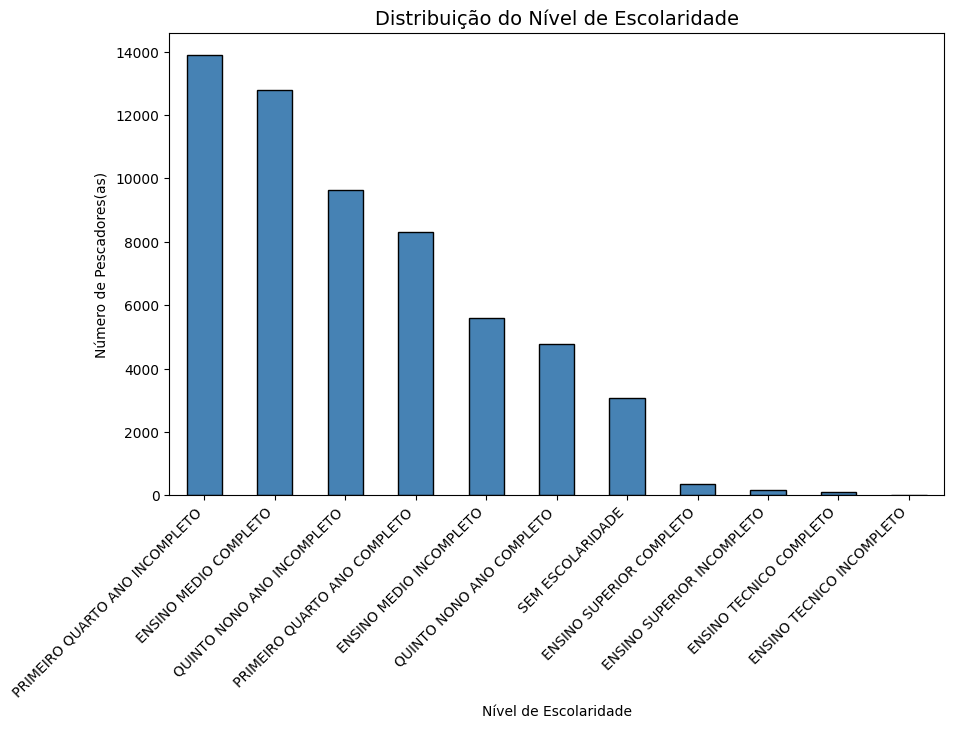

In [ ]:

# Contagem dos níveis de escolaridade
escolaridade_counts = df["Nivel Escolaridade"].value_counts()

# Gráfico de barras
plt.figure(figsize=(10,6))
escolaridade_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Distribuição do Nível de Escolaridade", fontsize=14)
plt.xlabel("Nível de Escolaridade")
plt.ylabel("Número de Pescadores(as)")
plt.xticks(rotation=45, ha="right")
plt.show()

#### Existem diferenças na escolaridade entre homens e mulheres pescadores?

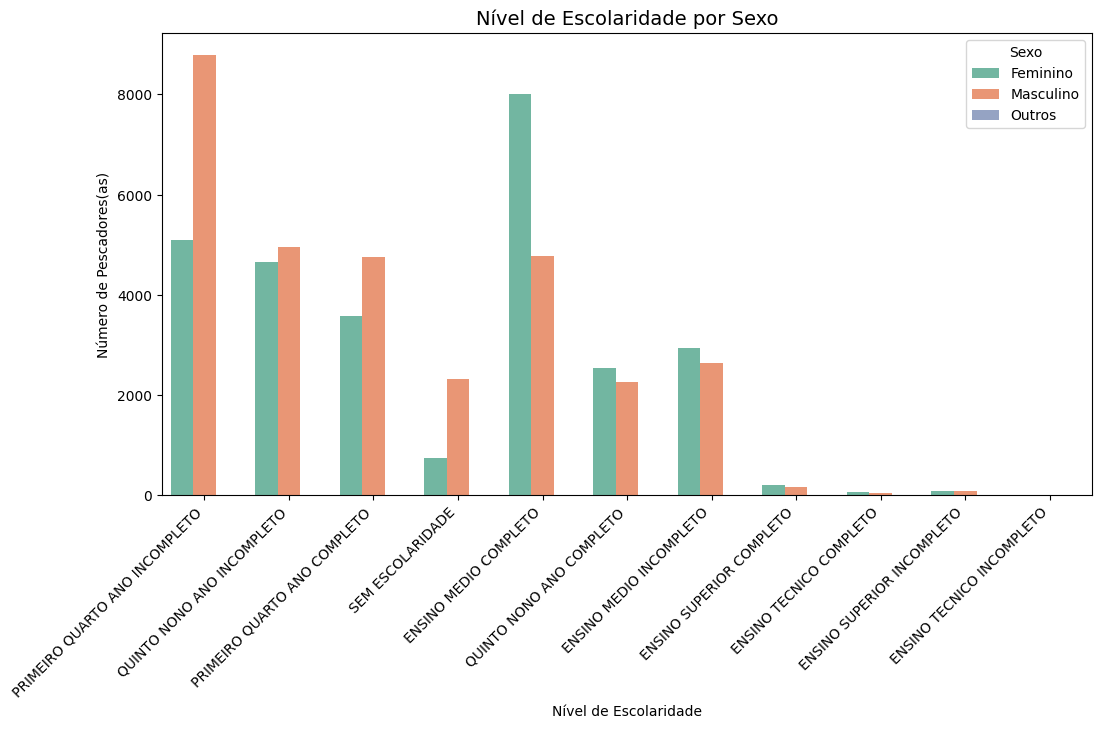

In [14]:

# Tabela cruzada (escolaridade x sexo)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Nivel Escolaridade", hue="Sexo", palette="Set2")

plt.title("Nível de Escolaridade por Sexo", fontsize=14)
plt.xlabel("Nível de Escolaridade")
plt.ylabel("Número de Pescadores(as)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sexo")
plt.show()


#### Qual é a distribuição etária dos pescadores(as) profissionais da Paraíba?

Faixa Etária
≤25       5328
26-35    13273
36-45    17123
46-60    20628
60+       2511
Name: count, dtype: int64


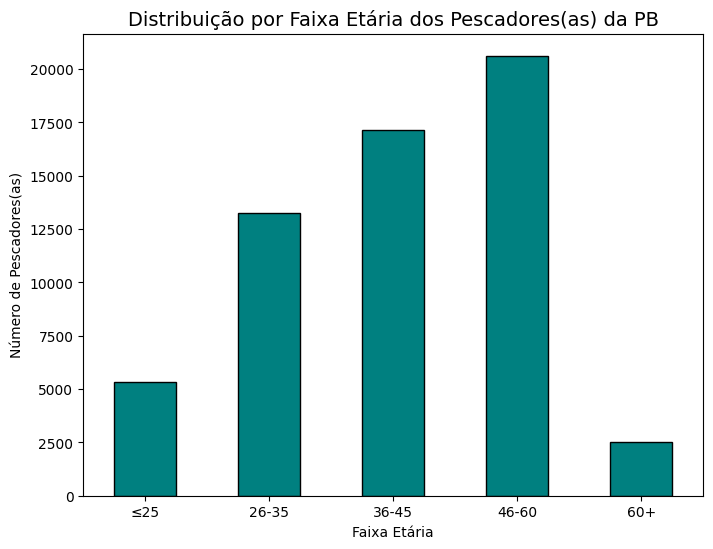

In [24]:
# Converter coluna para numérica (caso tenha valores inválidos)
df["Dt Nascimento"] = pd.to_numeric(df["Dt Nascimento"], errors="coerce")

# Remover linhas sem ano válido
df = df.dropna(subset=["Dt Nascimento"])

# Calcular idade
ano_atual = pd.Timestamp.today().year
df["Dt Nascimento"] = ano_atual - df["Dt Nascimento"]

# Criar faixas etárias
bins = [0, 25, 35, 45, 60, 100]
labels = ["≤25", "26-35", "36-45", "46-60", "60+"]
df["Faixa Etária"] = pd.cut(df["Dt Nascimento"], bins=bins, labels=labels, right=True)

# Contagem por faixa etária
faixas = df["Faixa Etária"].value_counts().sort_index()

# Verificar se há dados antes de plotar
print(faixas)

# Gráfico de barras
plt.figure(figsize=(8,6))
faixas.plot(kind="bar", color="teal", edgecolor="black")

plt.title("Distribuição por Faixa Etária dos Pescadores(as) da PB", fontsize=14)
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Pescadores(as)")
plt.xticks(rotation=0)
plt.show()

